# Title

## Logistic Regression

## The Dataset

## Outline
add a diagram instead

# Code

### Downloads and Imports

In [929]:
# !kaggle datasets download -d bhadaneeraj/cardio-vascular-disease-detection

In [930]:
# !unzip cardio-vascular-disease-detection.zip

In [931]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score,auc,roc_curve,roc_auc_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import sys
import re
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore",category=UserWarning)
sns.set_style(style='white')
sns.set(rc={'figure.figsize':(12,8)})
plt.rcParams['figure.figsize']=(12,8)

In [932]:
df=pd.read_csv("cardio_train.csv")

## Cleaning and EDA

normal features and datatypes
clean, remove duplicates or null rows 
discover the classes
look at distribution
understand the idiocycracies 
maybe look at the correlation between the features and class, heatmap 

In [933]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [934]:
df=df.drop(columns='id', axis=1)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [935]:
df.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [936]:
df.duplicated().sum()

24

In [937]:
df=df.drop_duplicates()

In [938]:
df.shape

(69277, 12)

In [939]:
df.nunique()

age            8069
gender            2
height          108
weight          285
ap_hi           153
ap_lo           157
cholesterol       3
gluc              3
smoke             2
alco              2
active            2
cardio            2
dtype: int64

Explain the categories of each field

In [940]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69277.000000,69277.000000,69277.000000,69277.000000,69277.000000,69277.000000,69277.000000,69277.000000,69277.000000,69277.000000,69277.000000,69277.000000
mean,19468.871415,1.349597,164.362140,74.205884,128.832787,96.656004,1.366933,1.226525,0.088081,0.053900,0.803975,0.499661
std,2467.386017,0.476846,8.206439,14.384935,154.802512,189.128722,0.680354,0.572330,0.283415,0.225821,0.396990,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17665.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


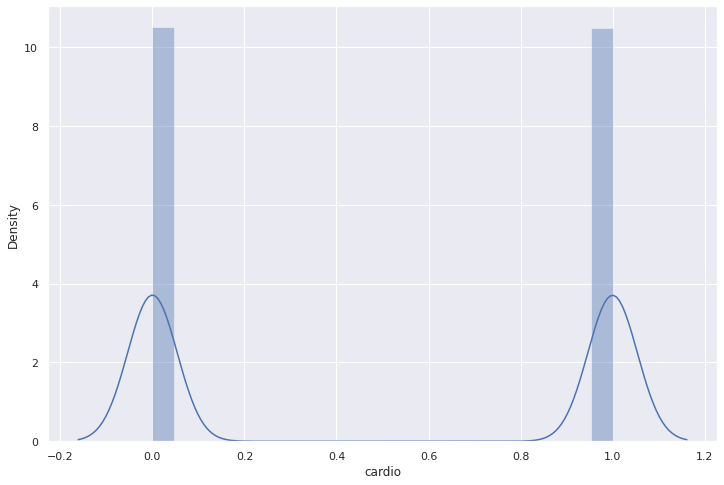

In [941]:
g=sns.distplot(df['cardio'])



In [942]:
# plt.figure(figsize=(15,10))
# cols=['age','height','weight','ap_hi','ap_lo']
# for i, col in enumerate(cols, 1):
#     plt.subplot(3, 2, i)
#     sns.histplot(x = df[col], kde=True, discrete=True)
#     plt.title(f"Distribution of {col} Data")
#     plt.tight_layout()
#     plt.plot()

<AxesSubplot:xlabel='age', ylabel='Density'>

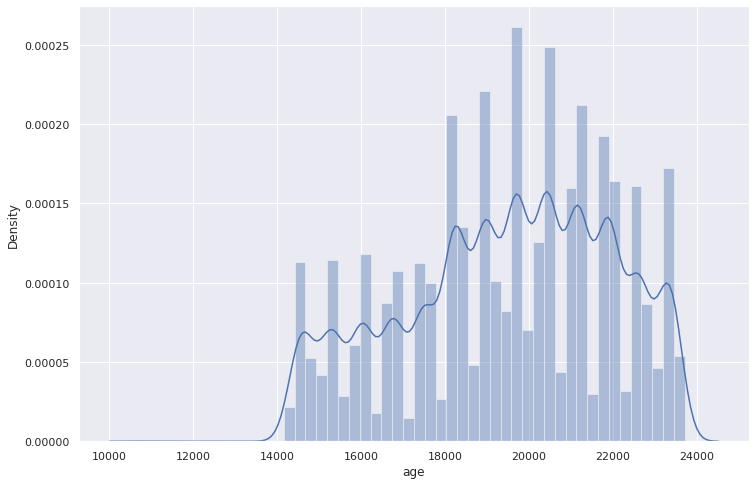

In [943]:
sns.distplot( df['age'])


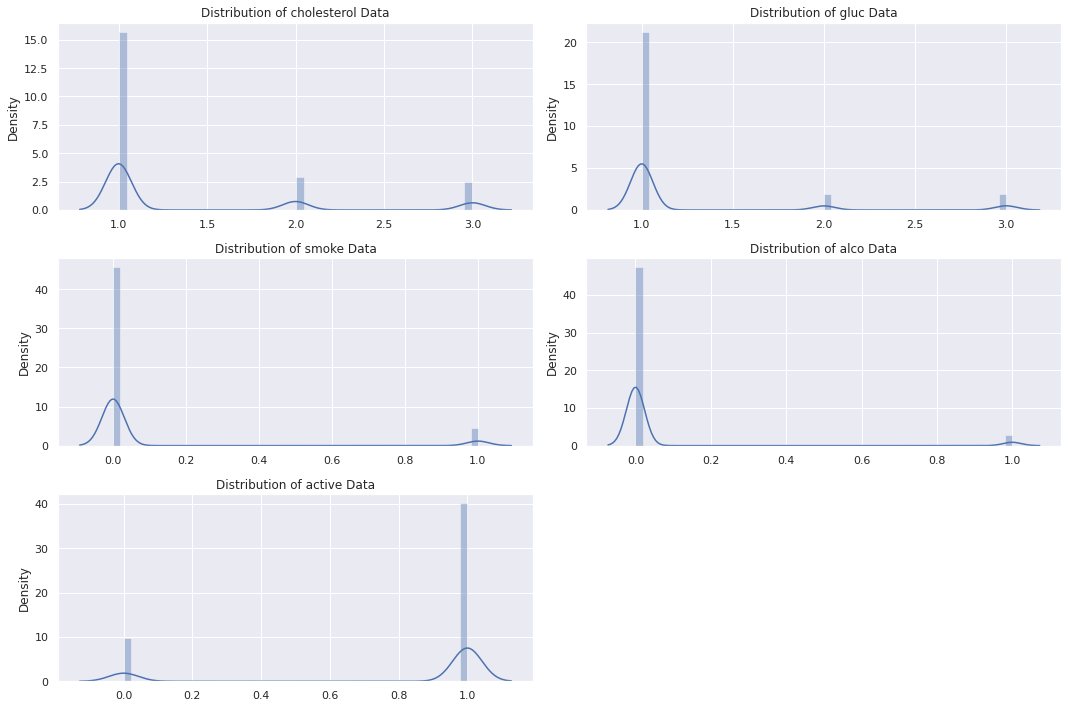

In [944]:
plt.figure(figsize=(15,10))
cols=['cholesterol','gluc','smoke','alco','active']
for i, col in enumerate(cols, 1):
    plt.subplot(3, 2, i)
    sns.distplot(x = df[col])
    plt.title(f"Distribution of {col} Data")
    plt.tight_layout()
    plt.plot()

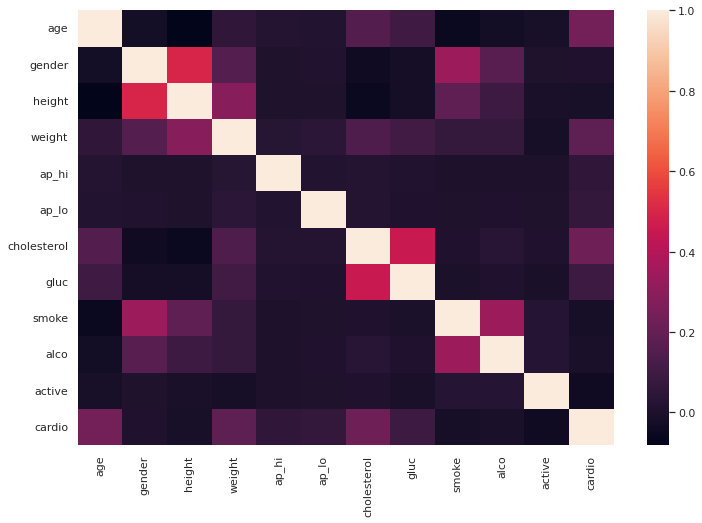

age            0.238125
gender         0.008519
height        -0.011066
weight         0.182033
ap_hi          0.054211
ap_lo          0.065288
cholesterol    0.220723
gluc           0.089022
smoke         -0.015273
alco          -0.007253
active        -0.035605
cardio         1.000000
Name: cardio, dtype: float64

In [945]:
df_corr = df.corr()
df_corr["cardio"]
sns.heatmap(df_corr)
plt.show()
df_corr['cardio']

## Model Building

In [946]:
scaler=StandardScaler()
y=df['cardio'].to_numpy()
X=df.drop(columns='cardio',axis=1)
caler = MinMaxScaler()
# X = caler.fit_transform(X)
X=scaler.fit_transform(X)
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=54)

In [947]:
X_train

array([[-0.81255461,  1.36397953,  0.68700935, ...,  3.21763312,
        -0.23868438,  0.49378055],
       [-2.0458525 , -0.73314883, -1.38454967, ..., -0.31078745,
        -0.23868438,  0.49378055],
       [ 0.32428422, -0.73314883, -0.16598554, ..., -0.31078745,
        -0.23868438,  0.49378055],
       ...,
       [ 0.04017584, -0.73314883,  0.44329652, ..., -0.31078745,
        -0.23868438,  0.49378055],
       [-1.32200431,  1.36397953,  0.80886576, ..., -0.31078745,
        -0.23868438,  0.49378055],
       [-0.51871926,  1.36397953,  0.93072217, ..., -0.31078745,
        -0.23868438,  0.49378055]])

### Logistic Regression

In [948]:
def sigmoid(z):
    return 1.0/(1+np.exp(-z))

def loss( y,h):
    h = np.clip(h, 1e-10, 1 - 1e-10)
    loss=(-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    return loss

def gradient_descent(X, h, y):
    return np.dot(X.T, (h - y)) / y.shape[0]

In [949]:
def gradients(X, y, y_hat):

    # X --> Input.
    # y --> true/target value.
    # y_hat --> hypothesis/predictions.
    # w --> weights (parameter).
    # b --> bias (parameter).

    # m-> number of training examples.
    m = X.shape[0]

    # Gradient of loss w.r.t weights.
    dw = (1/m)*np.dot(X.T, (y_hat - y))

    # Gradient of loss w.r.t bias.
    db = (1/m)*np.sum((y_hat - y))

    return dw, db





def train(X, y, bs, epochs, lr):

    # y --> true/target value.
    # bs --> Batch Size.
    # epochs --> Number of iterations.
    # lr --> Learning rate.

    # m-> number of training examples
    # n-> number of features
    m, n = X.shape

    # Initializing weights and bias to zeros.
    w = np.zeros((n,1))
    b = 0

    # Reshaping y.
    y = y.reshape(m,1)

    # Normalizing the inputs.

    # Empty list to store losses.
    losses = []

    # Training loop.
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):

            # Defining batches. SGD.
            start_i = i*bs
            end_i = start_i + bs
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]

            # Calculating hypothesis/prediction.
            y_hat = sigmoid(np.dot(xb, w) + b)

            # Getting the gradients of loss w.r.t parameters.
            dw, db = gradients(xb, yb, y_hat)

            # Updating the parameters.
            w -= lr*dw
            b -= lr*db

        # Calculating loss and appending it in the list.
        l = loss(y, sigmoid(np.dot(X, w) + b))
        losses.append(l)

    # returning weights, bias and losses(List).
    return w, b, losses

In [950]:
def predict(X,w,b):

    preds = sigmoid(np.dot(X, w) + b)
    pred_class = []
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    return np.array(pred_class)  

In [951]:

w, b, l = train(X_train, y_train, bs=100, epochs=1000, lr=0.01)
np.isnan(l).sum()


0

In [952]:
ypred=predict(X_test,w,b)

In [953]:
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)

ypredL = logreg.predict(X_test)

# Results Discussion

## Evaluation

### Training and Validation Loss

### Training and Validation Accuracy

### Confusion Matrix
A confusion matrix is a table used to evaluate the performance of a classification model. It allows you to visualize the performance of an algorithm by comparing the actual (true) labels with the predicted labels made by the model (Delovski, 2023). The matrix provides a detailed breakdown of the model's correct and incorrect predictions, helping you understand where the model is making errors.

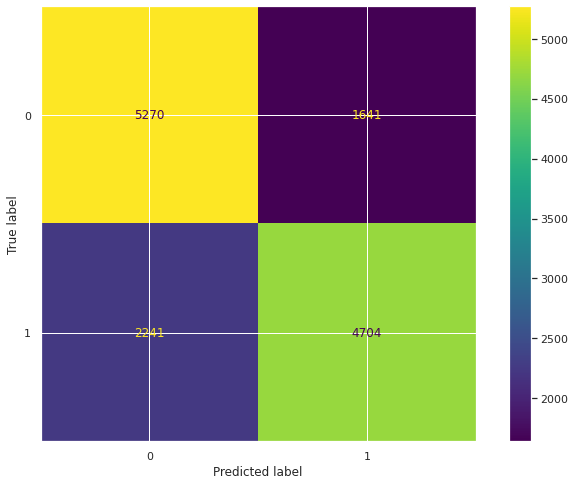

In [954]:
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, ypred))
cm.plot()

### Accuracy
Accuracy is the measure of how correct classifier is, as it takes the total number of correct predictions and divides it by the total number of predictions made (Agrawal, 2024). It allows for a general understanding of the ratio of correct predictions in the overall predictions. While this is a good indication of the model's performance accuracy does not take into account the false positive and false negatives. Accuracy is a good measure when the target is well balanced, as this would result in equal opportunities to make make true or false predictions equally thereby allowing a proper gauge at the model's accuracy (Wohlwend, 2023).

In [955]:
print(f' The Accuracy for the created model is :{accuracy_score(y_test,ypred)}')
print(f' The Accuracy for the Sklearn model is :{accuracy_score(y_test,ypredL)}')

 The Accuracy for the created model is :0.7198325635103926
 The Accuracy for the Sklearn model is :0.7183891454965358


### Precision
Precision is the measure of how positively correct a classifier is as it is the number of true positives divided by the sum of true and false positives. Precision expresses the proportion of data correctly predicted as positive (Delovski, 2023). Using it as a metric, you can define the percent of the predicted class inside the data you classified as that class (Wohlwend, 2023). In other words, precision helps you measure how often the model correctly predicted that a data point belongs to the class the model assigned to it. Precision is particularly useful in situations where the class distribution is imbalanced.  However Precision in important when in situations where false positives are costly or undesirable (Wohlwend, 2023).  In the context of this dataset precision is not of critical concern as flagging sentiment that is normal as depression would not lead to any adverse outcomes as getting someone help  who does not need it would not as  crucial of a  mistake as not getting someone help when the does need it.

In [956]:
print(f' The Precision for the created model is :{precision_score(y_test,ypred)}')
print(f' The Precision for the SK model is :{precision_score(y_test,ypredL)}')

 The Precision for the created model is :0.741371158392435
 The Precision for the SK model is :0.7407817692672891


### Recall
Recall is a measure of the true positives cases in all correctly predicted cases in the model(Agrawal, 2024). Recall is defined as the number of true positives divided by the sum of true positives and false negatives (Delovski, 2023). It expresses the ability to find all relevant instances in a dataset. Recall measures how good your model is at correctly predicting positive cases. Recall is a useful metric in cases where False Negative is of higher concern than False Positive. In the context of the dataset a False Negative is of a higher value as flagging something as normal when it is actually depression can lead to adverse outcome in mental health and not getting someone help in time.

In [957]:
print(f' The Recall for the created model is :{recall_score(y_test,ypred)}')
print(f' The Recall for the SK model is :{recall_score(y_test,ypredL)}')

 The Recall for the created model is :0.6773218142548596
 The Recall for the SK model is :0.6740100791936645


### F1-Score
The F1 score is a metric that combines both Precision and Recall which provides a balance between Precision and Recall and can be a better measure than Accuracy since this dataset is unbalanced (Wohlwend, 2023) . F1 score is the harmonic mean of Precision and Recall. The harmonic mean is a type of average that is used when you want to give more importance to smaller numbers. It is different from the regular (arithmetic) mean, which simply adds up all the numbers and divides by the count (Bromberg, 2023). A high F1 score is a good indicator that the model performed well because to achieve a high score both precision and recall need to be high.


In [958]:
print(f' The F1 Score for the created model is :{f1_score(y_test,ypred)}')
print(f' The F1 Score for the SK model is :{f1_score(y_test,ypredL)}')

 The F1 Score for the created model is :0.7079006772009029
 The F1 Score for the SK model is :0.7058202653799759


### ROC Receiver-operating characteristic curve and AUC Area under the curve
A Receiver-operating characteristic curve (ROC) is used for classification problems in which the True positive rate (Recall) and False positive rate are ploted on a graph, across various threshold settings, illustrating how well the model distinguishes between positive and negative classes (Bhandari, 2024). The ROC curve provides insights into the trade-offs between sensitivity (true positive rate) and the false positive rate as the classification threshold changes (Bhandari,2024).

The Area Under the Curve (AUC) is the measure of the ability of a binary classifier to distinguish between classes and is used as a summary of the ROC curve (Bhandari,2024). AUC value ranges from 0 to 1, where a higher AUC indicates a better-performing model. An AUC of 1 signifies perfect classification, while an AUC of 0.5 suggests random guessing (Bhandari,2024).The higher the AUC, the better the model's performance at distinguishing between the positive and negative classes. The ROC curve and AUC are particularly useful in scenarios with class imbalance, as they evaluate the model's performance independent of the threshold and provide a comprehensive measure of its discriminatory power.

In [959]:
print(f' The ROC for the created model is :{roc_auc_score(y_test,ypred)}')
print(f' The ROC for the SK model is :{roc_auc_score(y_test,ypredL)}')

 The ROC for the created model is :0.7199371334333189
 The ROC for the SK model is :0.7184983111928386


## Possible Improvements 

## Conclusion

# References

Agrawal, S.K., 2024. Metrics to Evaluate your Classification Model to take the right decisions. [Online] <br>
Available at: https://www.analyticsvidhya.com/blog/2021/07/metrics-to-evaluate-your-classification-model-to-take-the-right-decisions/<br>
[Accessed 30 August 2024]<br><br>


Bhandari, A. 2024. Guide to AUC ROC Curve in Machine Learning : What Is Specificity?.[Online].<br>Available at:https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/  <br> [Accessed 30 August 2024] <br><br>
Bromberg, M., 2024. Harmonic Mean Definition, Formula, and Examples. [Online] <br>
Available at:https://www.investopedia.com/terms/h/harmonicaverage.asp<br>
[Accessed 30 August 2024]<br><br>

Delovskli, B., 2023. How to Evaluate Classification Models. [Online] <br>
Available at: https://www.edlitera.com/en/blog/posts/evaluating-classification-models<br>
[Accessed 30 August 2024]<br><br>








